# Prosjekt 2 VitBer
Gruppe 49: Martin Johnsrud, Hans Giil, Eirik Høydalsvik

### Teori
(Her er alltid $j$ indeks for $x$, mens $k$ er ineks for energier)

Vi skal lage en algoritme som tar i et potensialet $V(x)$, hvor vi antatr $V(x) = \infty, x \in [-\infty, 0> \cup <L, \infty]$, mens det kan ha en virkårlig form i intervallet $I = [0, L>$. $I$ Diskretiseres opp i $n$ delintervaller, $\{I_j\}_{j = 1} ^ {n}$, med lengder på $\Delta x = L / (n + 1)$. Vi diskretiserer derreter potensialet ved å sette $V_j = V(\Delta x \cdot j), \, j = 1, 2, ... n$ og grensebetingelsene $V_0 = V_{n+1} = \infty$, slik at vi har en vektor ${\vec V} = [V_1, V_2, ... V_{n + 1}]$. Den tidsuavhengige Shrödingerligningen i 1D, TUSL, er gitt ved 

$$ \hat H \psi(x) =  \Big( \frac{-\hbar}{2m} \frac{\partial^2}{\partial x^2} + \hat V\Big) \psi(x) = E \psi(x) $$

Vi diskretiserer $\psi(x)$ på samme måten, og lar $\psi_j = \psi(\Delta x \cdot j),\, \psi_0 = \psi_{n+1} = 0$ som gir vektoren $\vec \psi$. Hamiltonoperatoren tilnærmes med matrisen $\mathbb{H} = [H_{j, k}]$, som er tri-diagonal, slik at

$$
\mathbb{H}=
\begin{pmatrix}
    H_{1, 1} & H_{1, 2} & 0        & 0          & \dots      & 0            \\[1mm]
    H_{2, 1} & H_{2, 2} & H_{2, 3} & 0          & \dots      & \vdots       \\[1mm]
    0        & H_{3, 2} & \ddots   & \ddots     & 0          & 0            \\[1mm]
    0        & 0        & \ddots   & \ddots     & H_{n-1, n} & 0            \\[1mm]
    \vdots   & \vdots   & 0        & H_{n, n-1} & H_{n, n}   & H_{n, n+1}   \\[1mm]
    0        & \dots    & 0        & 0          & H_{n+1, n} & H_{n+1, n+1} \\[1mm]
 \end{pmatrix}
$$

hvor $H_{j, j} = \frac{\hbar^2}{m(\Delta x)^2} + V_j$, og $H_{j, j\pm 1} = \frac{-\hbar^2}{2m(\Delta x)^2}$. TUSL kan da aproskimeres som et egenverdiproblem,

$$ \mathbb{H} \vec \psi_k = E_k \vec \psi_k$$

Dette gir $n$ forskjellige egenverdier $E_j$, med tilhørende egenvektorer $\vec \psi_k = \psi_{j, k}$, hvor den  som er en aproksimasjon av egenfunksjonen til den . Derreter kan vi tidsutvikle en vilkårilg starttilstand $\Psi (x, 0)$. Denne starttilstanden aproksimeres som en superposisjonen av egenvektorene, 

$$\Psi_j = \sum_{k = 1}^{n} c_{k} \psi_{j, k} \exp(-i E_k t / \hbar),$$

eller med matrisenotasjon $\psi = [\psi_{j, k}], \, \vec c = [c_1, c_2, ... c_{n+1}]$ blir det $\vec \Psi(t) = \psi (\vec c \cdot \exp(i t / \hbar \vec E)) $. $\vec c$ finnes ved $c_j = \sum_{j = 1}^{n + 1} \psi_{j, k} \Psi_j$, eller $\vec c = \vec \Psi^T \psi$ 

**Notasjon**

$V(x) =$ `VKont(x)`  
$L =$ `L`  
$\Delta x$ = `deltaX`  
$n$ = `n`  
$\vec V$ = `V`  
$\mathbb{H} = $ `H[j][k]`  
$\psi = $ `psi[j][k]`  
$c = $ `c[k]`  
$\Psi(x, 0) = $ `f(x)`  
$\vec \Psi(t) = $ `Psi[j](t)`  

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np
from numpy import pi



L = 1
n = 1000
m = 1
k = 1
hbar = 1
inf = 1e10        # Alle vet at uendelig er ca 10 milliarder
deltaX = L / (n + 1)
x = np.linspace(0, L, n + 2)


def solveTUSL(V, x, n):
    
    # Hjj are diagonal values, HOD are of the diagonal
    Hjj = hbar**2 / (m * deltaX**2)* np.ones(n) + V[1:-1]
    HOD= -hbar**2 / (2 * m * deltaX**2) * np.ones(n - 1)
    return la.eigh_tridiagonal(Hjj, HOD)


def plotEigenfunc(phi, V, x, l):
    
    font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 25}
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'
    mpl.rc('font', **font)
    
    fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))

    # Inneholder Line2D elementer som viser legend hvordan linja ser ut
    legendElement = [0] * (l + 1)
    legendElement[0], = ax1.plot(x, V, color="Black", label="$V_0$")
    ax1.set_label("E")
    ax1.set_xlabel("$x/[m]$")
    ax1.set_ylabel("$E/[J]$")
    labels =  [0] * (l + 1)
    labels[0] = "$V(x)$"
    ax2 = ax1.twinx()
    ax2.set_ylabel("$\psi$")

    for i in range(l):
        legendElement[1 + i],  = ax2.plot(x[1: -1], phi[:, i])
        labels[1+ i] = "$E_" + str(i + 1) + "$"

    ax1.set_ylim(np.min(V[1:-1])*1.2, np.max(V[1:-1])*1.2)
    ax2.set_ylim(np.min(phi)*1.2, np.max(phi)*1.2)
    ax2.legend(legendElement[:][:l + 1], labels[:l + 1], fontsize=20)
    plt.show()

## Oppgave 1: Partikkel i boks

1) Sjekk om svar stemmer med de analytiske løsningene  
2) Sjekk om løsningene er ortonormerte  
3) Sjekk om det er et fullstendig sett


(Gjør det mulig å tidsuvikle en sartposisjon?)  
(Lag finer plott?)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0


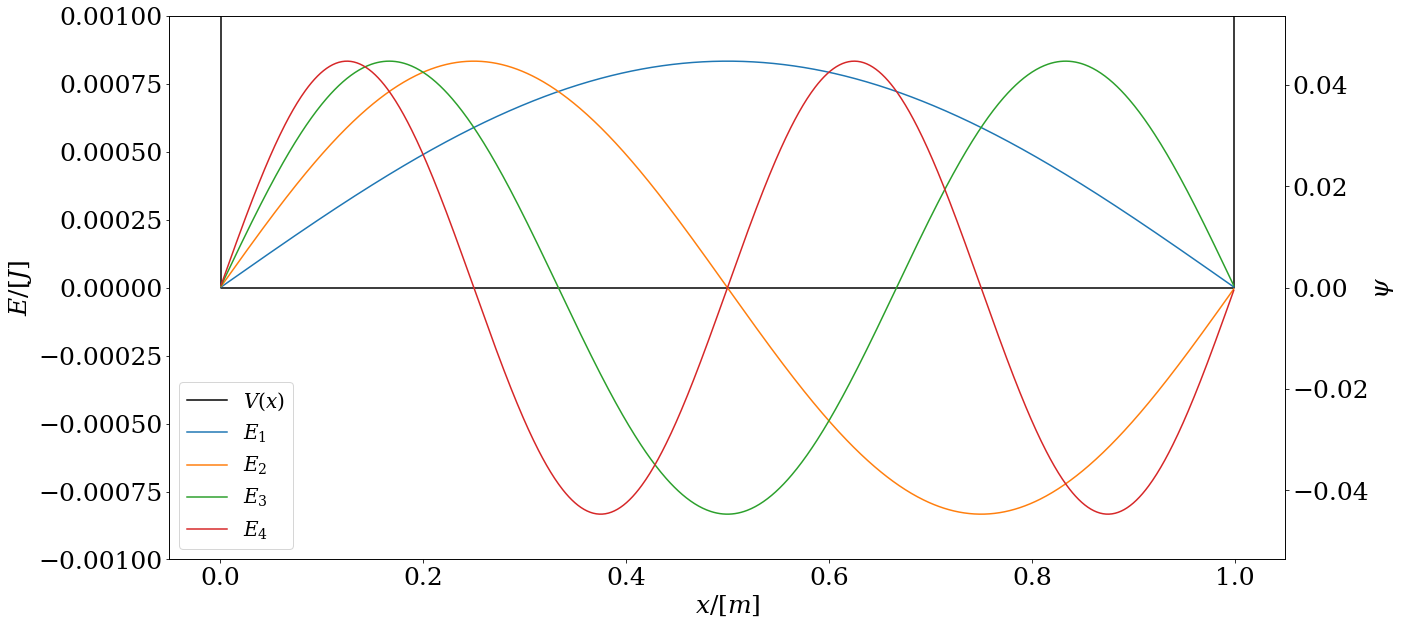

Energies:
Numerical:       Analytical:
4.934798150100738 4.934802200544679
19.739143992649232 19.739208802178716
44.41289170696814 44.41321980490211
78.9557982589526 78.95683520871486


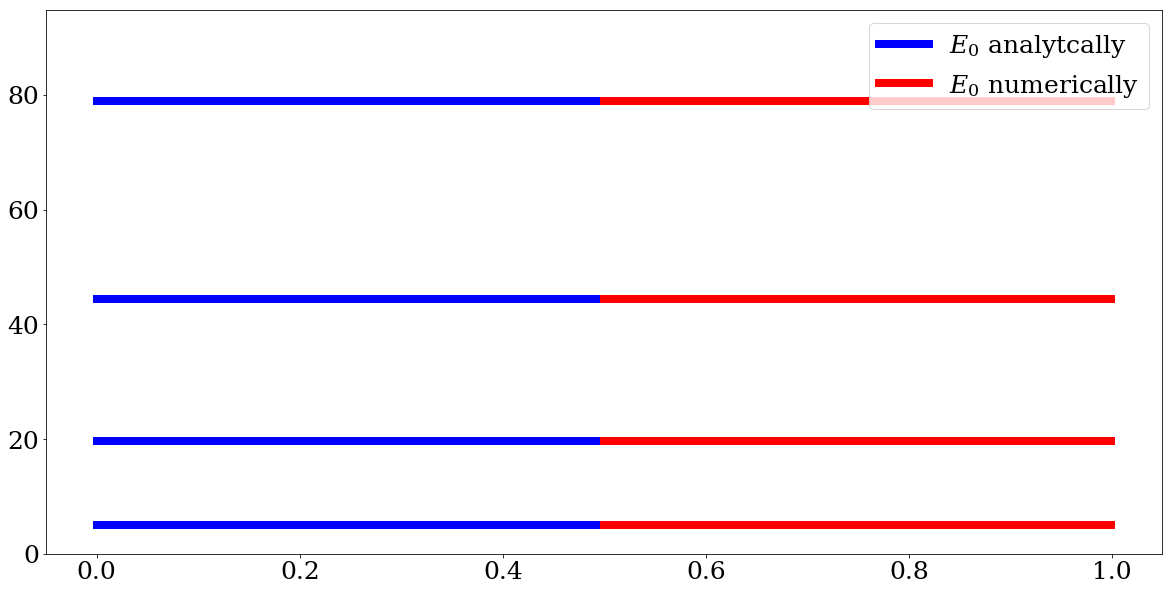

In [2]:
V = np.zeros(n + 2)
V[0], V[-1] = inf, inf

def EExact(j):
    return hbar * ((j + 1) * pi / L)**2 / (2 * m)

E, phi = solveTUSL(V, x, n)
l = 4

plotEigenfunc(phi, V, x, l)

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
legendElement = [0, 0]
labels = ["$E_0$ analytcally", "$E_0$ numerically"]

print("Energies:")
print("Numerical:       Analytical:")
for i in range(l):
    print(E[i], EExact(i))
    legendElement[0], = axs.plot(x[0:n//2], np.ones(n//2) * E[i], linewidth=8, color="blue")
    legendElement[1], = axs.plot(x[n//2:-1], np.ones(n//2 + 1) * EExact(i), linewidth=8, color= "red")
    
axs.set_ylim(0, E[l - 1]*1.2)
axs.legend(legendElement[:], labels)
plt.show()

## Oppgave 2: Atomer

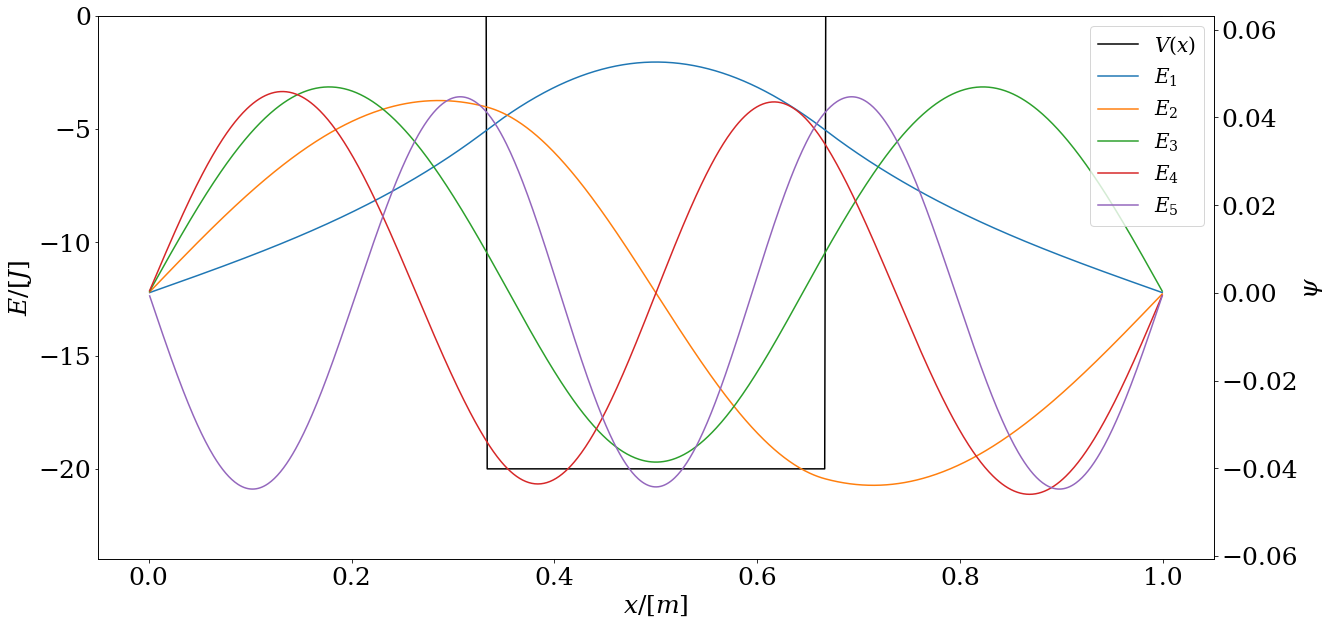

-8.843635277393794
15.102431227330051
39.029370223389144
71.02482236549395
117.7298834282811


In [3]:
V0 = -20
V = np.concatenate((np.zeros(n // 3 + 1), V0 * np.ones(n - 2 * n // 3), np.zeros(n // 3 + 1)))

V[0] = inf
V[-1] = inf
E, phi = solveTUSL(V, x, n)
l = 5
plotEigenfunc(phi, V, x, l)

for i in range(l):
    print(E[i] - V[1:-1][i])

## Oppgave 3: Molekyler

181
361
541
721
901


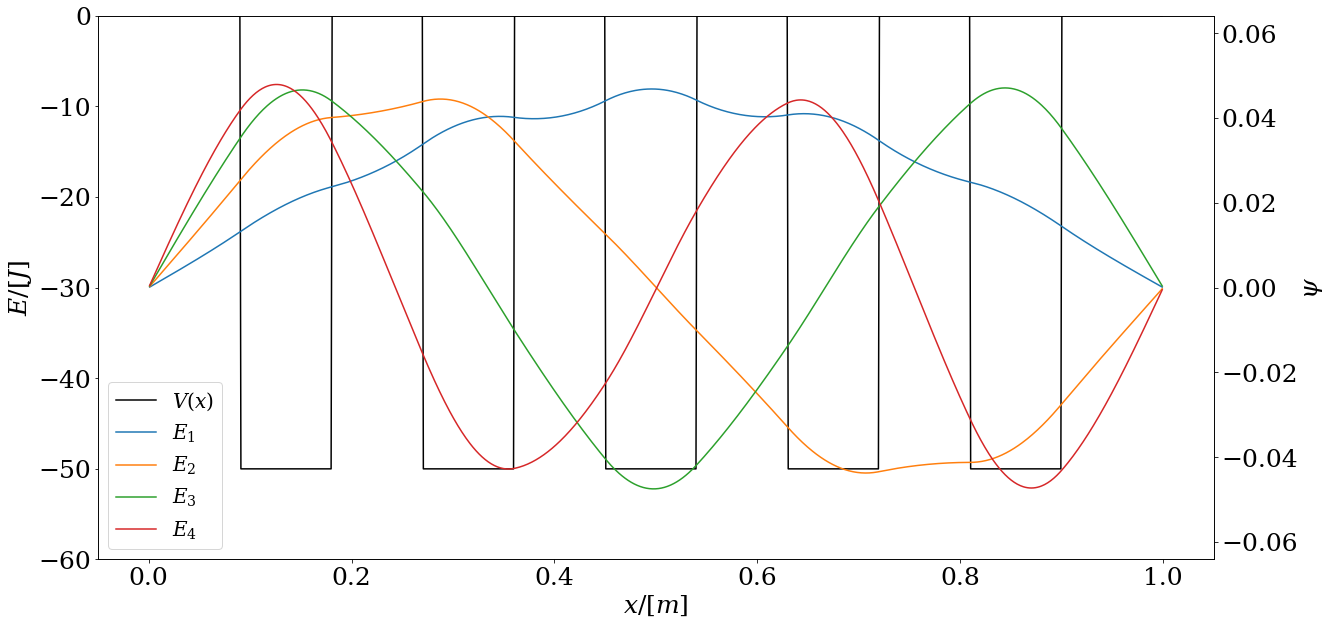

-20.991708350396994
-6.479797681105765
17.53888321556066
50.50551392880777


In [19]:
V0 = -50
w = 5
V = np.ones(1) * inf
for i in range(w):
    V = np.concatenate((V, np.zeros(n // (2 * w + 1)), V0 * np.ones(n // (2 *w + 1))))
    print(len(V))

V = np.concatenate((V, np.zeros(n // (2 * w + 1) + n % (2*w + 1)), np.ones(1) * inf))

E, phi = solveTUSL(V, x, n)
l = 4
plotEigenfunc(phi, V, x, l)

for i in range(l):
    print(E[i] - V[1:-1][i])

## Oppgave 4: Krystaller

## Bonus: Tidsutvikling

## Lekestua

In [ ]:
def VExact(x):
    return 1/2*m*k*(x - L/2)**2*1000

V = VExact(x)
V[0] = inf
V[-1] = inf
E, phi = solveTUSL(V, x, n)
l = 5
plotEigenfunc(phi, V, x, l)
for i in range(l):
    print(E[i] - V[1:-1][i])